In [164]:

import ibmos2spark
import matplotlib.pyplot as plt

# @hidden_cell
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': '90221712379043cd83dab8354f3696b1',
    'region': 'dallas',
    'user_id': 'e93f135669654fc7903ec02d91b30fc0',
    'username': 'member_ff44c342a187385a1290796fd3057496bc8f0245',
    'password': 'IJu[81^Ym?Lb*gzK'
}

configuration_name = 'os_d70090ea2713458691c183ed383d2c8c_configs'
bmos = ibmos2spark.bluemix(sc, credentials, configuration_name)

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(bmos.url('DefaultProjectrajvimodhsjsuedu', 'data.csv'))
df_data_1.take(5)


[Row(ISO Code=u'AFG', Country=u'Afghanistan', Year=u'1990', ImprovedTU=u'0', ImprovedPU=u'3', ImprovedOU=u'0', UnimprovedOU=u'0', UnimprovedSU=u'0', ImprovedTR=u'0', ImprovedPR=u'0', ImprovedOR=u'0', UnimprovedOR=u'0', UnimprovedSR=u'0', ImprovedTT=u'0', ImprovedPT=u'1', ImprovedOT=u'0', UnimprovedOT=u'0', UnimprovedST=u'0'),
 Row(ISO Code=u'AFG', Country=u'Afghanistan', Year=u'2015', ImprovedTU=u'78', ImprovedPU=u'31', ImprovedOU=u'47', UnimprovedOU=u'20', UnimprovedSU=u'2', ImprovedTR=u'47', ImprovedPR=u'5', ImprovedOR=u'42', UnimprovedOR=u'46', UnimprovedSR=u'7', ImprovedTT=u'55', ImprovedPT=u'12', ImprovedOT=u'43', UnimprovedOT=u'39', UnimprovedST=u'6'),
 Row(ISO Code=u'ALB', Country=u'Albania', Year=u'1990', ImprovedTU=u'100', ImprovedPU=u'98', ImprovedOU=u'2', UnimprovedOU=u'0', UnimprovedSU=u'0', ImprovedTR=u'0', ImprovedPR=u'0', ImprovedOR=u'0', UnimprovedOR=u'0', UnimprovedSR=u'0', ImprovedTT=u'0', ImprovedPT=u'0', ImprovedOT=u'0', UnimprovedOT=u'0', UnimprovedST=u'0'),
 Row(I

In [77]:
sqlContext.registerDataFrameAsTable(df_data_1,"myTable")

+--------------------+-----------+
|             country|improvement|
+--------------------+-----------+
|          Martinique|      100.0|
|Sao Tome and Prin...|       99.0|
|      Cayman Islands|       97.0|
|               Gabon|       97.0|
|                0uru|       97.0|
|         Timor0Leste|       95.0|
|            Anguilla|       95.0|
|          Cape Verde|       94.0|
|     Solomon Islands|       93.0|
|          Tajikistan|       93.0|
+--------------------+-----------+



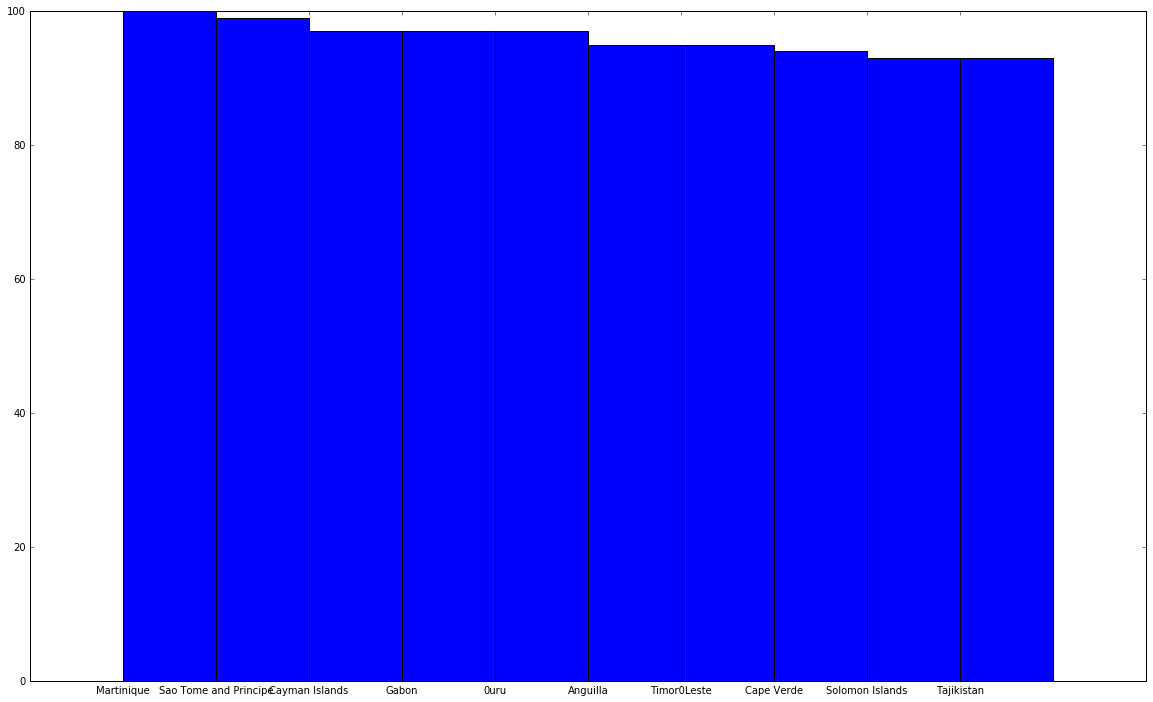

In [203]:
data=spark.sql("select a.country, a.improvedtu-b.improvedtu as improvement from mytable a join mytable b on a.country = b.country where a.year = 2015 and b.year = 1990 order by 2 desc limit 10")
data.show()

countries = data.select("country").rdd.flatMap(lambda x: x).collect()
improvements = data.select("improvement").rdd.flatMap(lambda x: x).collect()

indexes = [1,2,3,4,5,6,7,8,9,10]
bar_width = 1  # default: 0.8
plt.figure(figsize=(20, 12))
plt.bar(indexes, improvements, bar_width)
plt.xticks(indexes, countries)
plt.show()



+--------------------+-----------+
|             country|improvement|
+--------------------+-----------+
|         Puerto Rico|      -94.0|
|          Uzbekistan|      -90.0|
|               Palau|      -90.0|
|Libyan Arab Jamah...|      -71.0|
|               Sudan|      -67.0|
|               Yemen|      -66.0|
|               World|       -7.0|
|             Algeria|       -7.0|
|               Haiti|       -4.0|
|Micronesia (Fed. ...|       -2.0|
+--------------------+-----------+



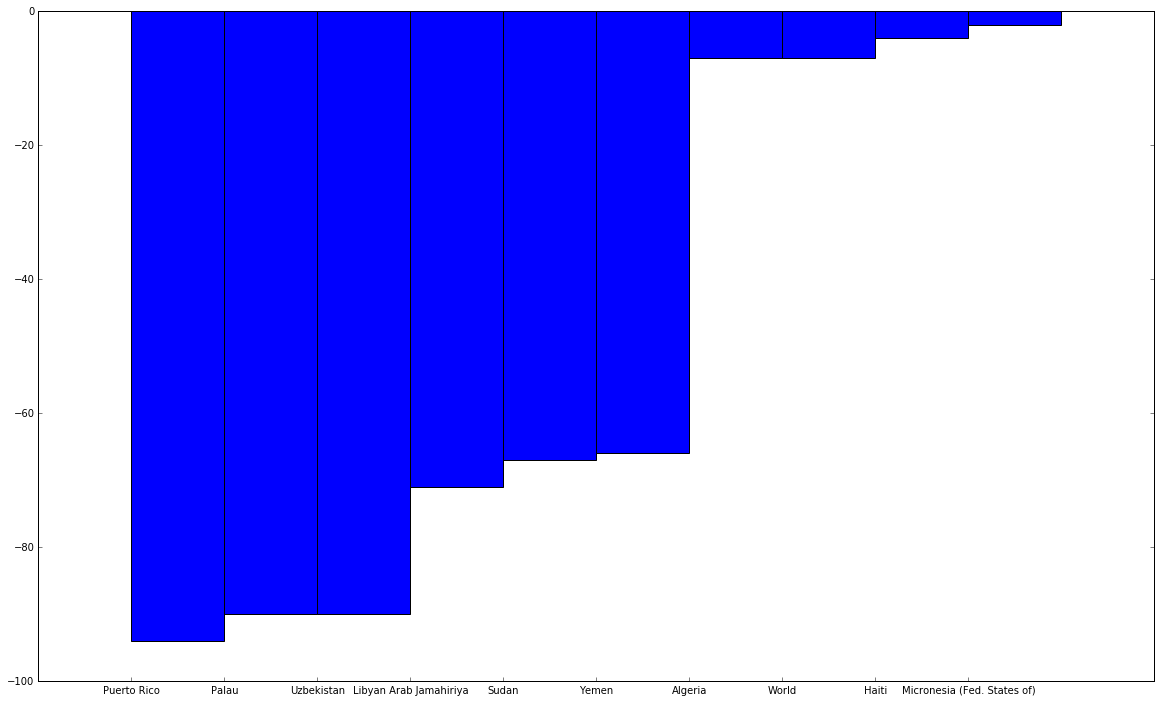

In [211]:

data=spark.sql("select a.country, a.improvedtt-b.improvedtt as improvement from mytable a join mytable b on a.country = b.country where a.year = 2015 and b.year = 1990 order by 2 asc limit 10")
data.show()

countries = data.select("country").rdd.flatMap(lambda x: x).collect()
improvements = data.select("improvement").rdd.flatMap(lambda x: x).collect()

indexes = [1,2,3,4,5,6,7,8,9,10]
bar_width = 1  # default: 0.8
plt.figure(figsize=(20, 12))
plt.bar(indexes, improvements, bar_width)
plt.xticks(indexes, countries)
plt.show()
                    
          


+--------------------+-----------+
|             country|improvement|
+--------------------+-----------+
|             Armenia|      100.0|
|          Montenegro|       99.0|
|             Ukraine|       98.0|
|             Albania|       95.0|
|Sao Tome and Prin...|       94.0|
|                Cuba|       90.0|
|             Suri0me|       88.0|
|          Cape Verde|       87.0|
| Republic of Moldova|       81.0|
|Occupied Palestin...|       81.0|
+--------------------+-----------+



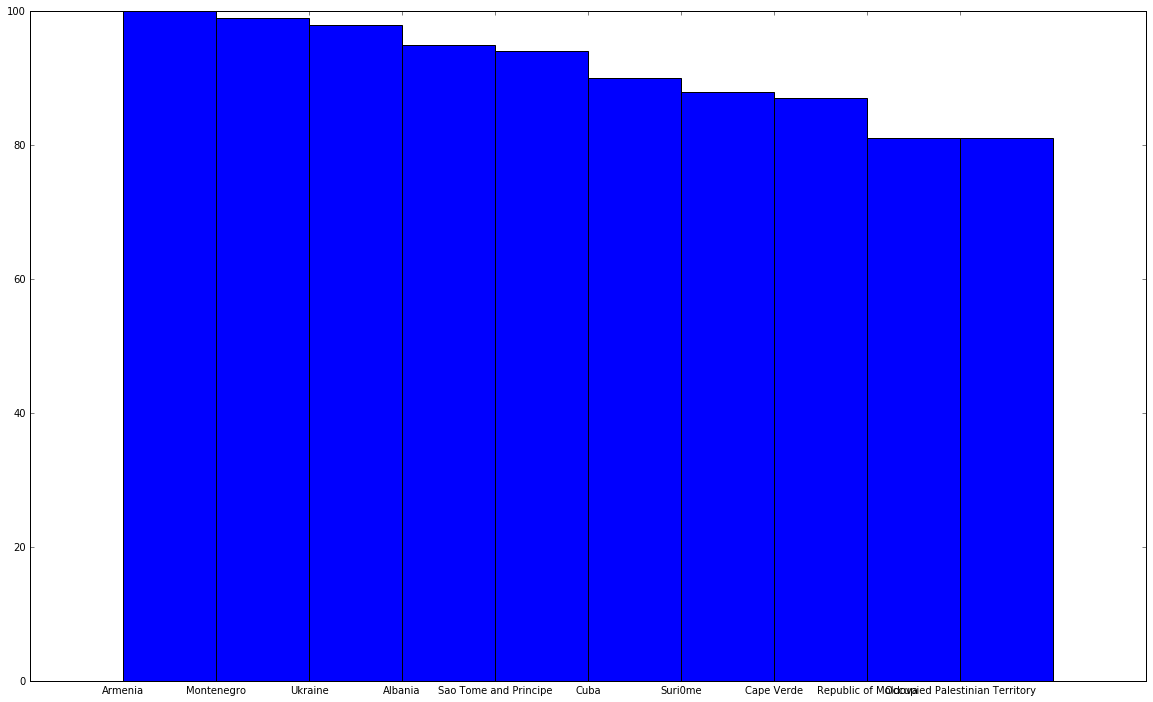

In [210]:
data=spark.sql("select a.country, a.improvedtr-b.improvedtr as improvement from mytable a join mytable b on a.country = b.country where a.year = 2015 and b.year = 1990 order by 2 desc limit 10")
data.show()

countries = data.select("country").rdd.flatMap(lambda x: x).collect()
improvements = data.select("improvement").rdd.flatMap(lambda x: x).collect()

indexes = [1,2,3,4,5,6,7,8,9,10]
bar_width = 1  # default: 0.8
plt.figure(figsize=(20, 12))
plt.bar(indexes, improvements, bar_width)
plt.xticks(indexes, countries)
plt.show()

+--------------------+-----------+
|             country|improvement|
+--------------------+-----------+
|          Uzbekistan|      -85.0|
|               Palau|      -72.0|
|Libyan Arab Jamah...|      -68.0|
|               Sudan|      -61.0|
|               Yemen|      -59.0|
|              Angola|      -16.0|
|            Zimbabwe|       -4.0|
|          Kazakhstan|       -4.0|
|             Algeria|       -3.0|
|Micronesia (Fed. ...|       -3.0|
+--------------------+-----------+



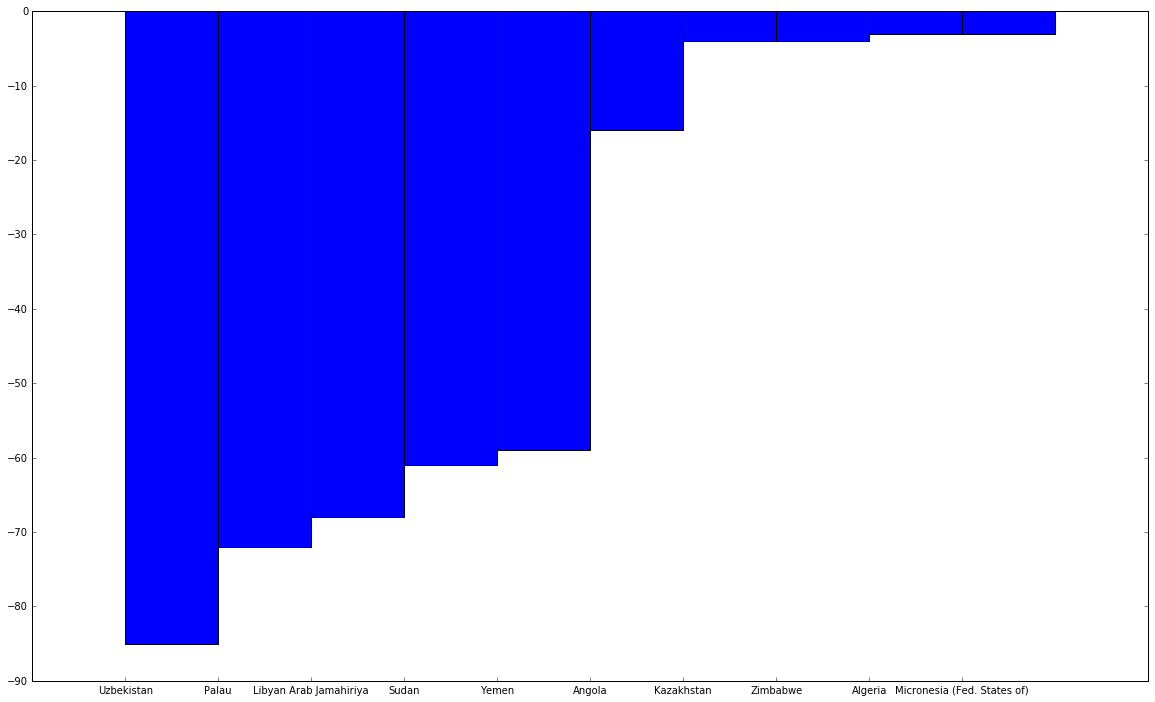

In [208]:
data=spark.sql("select a.country, a.improvedtr-b.improvedtr as improvement from mytable a join mytable b on a.country = b.country where a.year = 2015 and b.year = 1990 order by 2 asc limit 10")
data.show()

countries = data.select("country").rdd.flatMap(lambda x: x).collect()
improvements = data.select("improvement").rdd.flatMap(lambda x: x).collect()

indexes = [1,2,3,4,5,6,7,8,9,10]
bar_width = 1  # default: 0.8
plt.figure(figsize=(20, 12))
plt.bar(indexes, improvements, bar_width)
plt.xticks(indexes, countries)
plt.show()

In [ ]:
data=spark.sql()
data.show()